<a href="https://colab.research.google.com/github/Asala-Ahmed/Backup-linux/blob/master/Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Imports

In [3]:
import numpy as np
from sklearn.cluster import KMeans
import math
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.linalg import eigh
from sklearn.neighbors import kneighbors_graph

Question 1 "a"

In [4]:
#initialize the scattered points
scattered_points = np.array([[5,10,11,6,10,12,13,5,10,13,6,9,11,14,15,2,3,5,6,7,3,15,7,8],[8,8,8,7,7,7,7,6,6,6,5,4,5,6,5,4,4,4,4,4,3,4,3,2]])
scattered_points = np.transpose(scattered_points)
gammas = [0.01, 0.1, 1, 10]
#print(scattered_points)
k = 3 # number of clusters
# calculate the distance between each point and each of the 3 centroids
distances = np.zeros((scattered_points.shape[0], scattered_points.shape[0]))
for i in range(scattered_points.shape[0]):
        for j in range(i+1, scattered_points.shape[0]):
            dist = math.dist(scattered_points[i], scattered_points[j])
            distances[i,j] = dist
            distances[j,i] = dist

#print(distances)


In [97]:
def clustering(distances,gammas):
  for gamma in gammas:
    kernel_matrix = np.exp(-gamma * distances**2)
    D = np.diag(np.sum(kernel_matrix, axis=1))
    L = D - kernel_matrix
    eigvals, eigvecs = np.linalg.eig(L)
    index = eigvals.argsort()[::1] # The eigenvalues and eigenvectors are then sorted in ascending order
    eigvals = eigvals[index][:k+1] # truncated to only keep the k+1 smallest eigenvalues 
    eigvecs = eigvecs[:,index][:,1:k+1] # truncated the corresponding eigenvectors (excluding the first trivial eigenvector)
    #print(eigvals)
    #print(eigvecs)
    kmeans = KMeans(n_clusters=k).fit(eigvecs)
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(eigvecs[:, 0], eigvecs[:, 1], eigvecs[:, 2], c=kmeans.labels_)
    ax.set_title("Gamma = {}".format(gamma))
    plt.show()

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


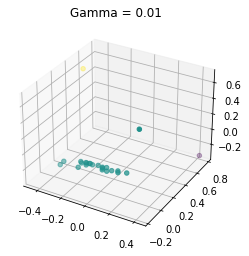

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


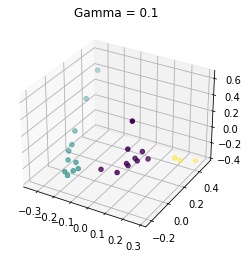

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


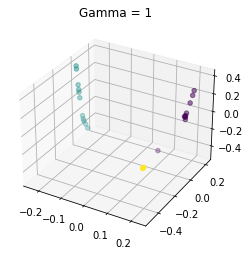

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


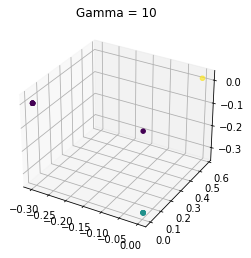

In [98]:
clustering(distances,gammas)

Question 1 "b"

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


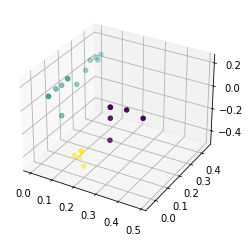

In [116]:
nn_graph = kneighbors_graph(scattered_points, n_neighbors=3, mode='connectivity') #get the nearest 3 points to each point
similarity_matrix = nn_graph.toarray() #set the s[i,j]=1 iff its one of the nearest 3 points to this point
degree_matrix = np.diag(np.sum(similarity_matrix, axis=1)) 
L = degree_matrix - similarity_matrix
eigenvalue, eigenvector = np.linalg.eigh(L)
eigenvector = eigenvector[:, :k]
kmeans = KMeans(n_clusters=k, random_state=0).fit(eigenvector)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(eigenvector[:, 0], eigenvector[:, 1], eigenvector[:, 2], c=kmeans.labels_)
#ax.set_title()
plt.show()

Question 2 "a"

In [5]:
def plot(kmeans):
  cluster_assignments = kmeans.fit_predict(scattered_points)
  cluster_centers = kmeans.cluster_centers_
  labels = kmeans.labels_
  fig = plt.figure()
  ax = fig.add_subplot(111, projection='3d')
  ax.scatter(scattered_points[:, 0], scattered_points[:, 1], c=cluster_assignments, cmap='viridis')
  ax.scatter(cluster_centers[:, 0], cluster_centers[:, 1], c='r', marker='o', s=24)
  plt.show()
  return cluster_centers, labels

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


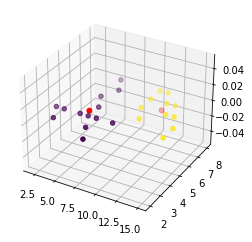

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


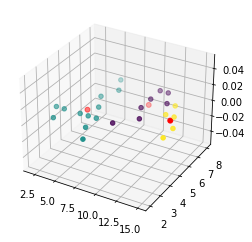

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


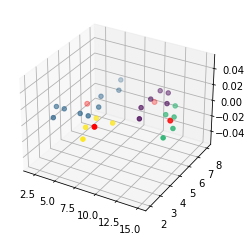

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


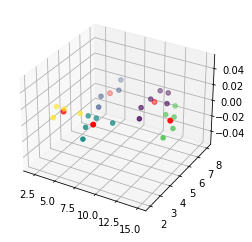

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


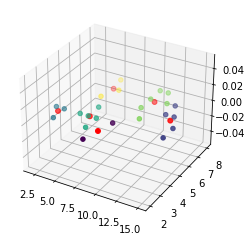

In [6]:
cluster_centers_2, labels_2 = plot(KMeans(n_clusters=2, random_state=0))
cluster_centers_3, labels_3 = plot(KMeans(n_clusters=3, random_state=0))
cluster_centers_4, labels_4 = plot(KMeans(n_clusters=4, random_state=0))
cluster_centers_5, labels_5 = plot(KMeans(n_clusters=5, random_state=0))
cluster_centers_6, labels_6 = plot(KMeans(n_clusters=6, random_state=0))

Question 2 "b"

In [186]:
def NN_plot(N,k):
  nn_graph = kneighbors_graph(scattered_points, n_neighbors=N, mode='connectivity') #get the nearest 3 points to each point
  similarity_matrix = nn_graph.toarray() #set the s[i,j]=1 iff its one of the nearest 3 points to this point
  degree_matrix = np.diag(np.sum(similarity_matrix, axis=1)) 
  L = degree_matrix - similarity_matrix
  eigenvalue, eigenvector = np.linalg.eigh(L)
  eigenvector = eigenvector[:, :k]
  kmeans = KMeans(n_clusters=k, random_state=0).fit(eigenvector)
  plt.scatter(scattered_points[:, 0], scattered_points[:, 1], c=kmeans.labels_)
  plt.title('Clustering Result for k={} and N={}'.format(k,N))
  plt.show()

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


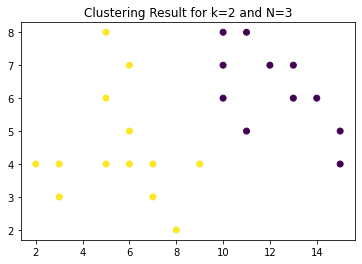

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


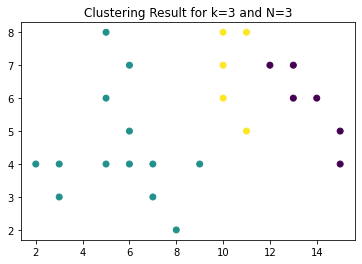

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


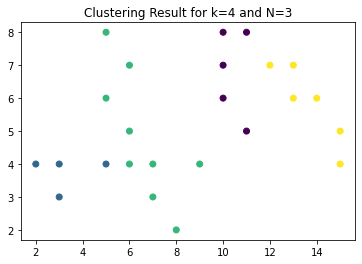

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


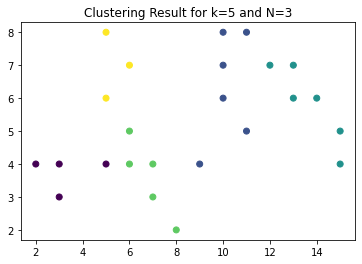

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


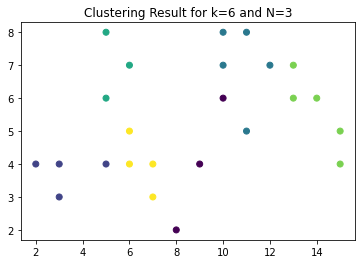

In [187]:
NN_plot(3,2)   
NN_plot(3,3)
NN_plot(3,4)
NN_plot(3,5)
NN_plot(3,6)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


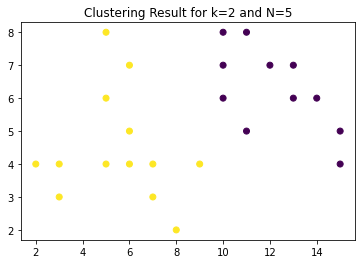

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


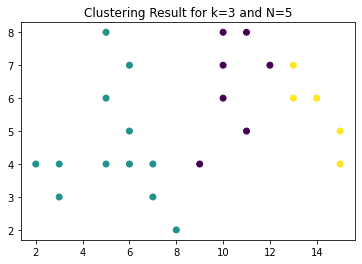

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


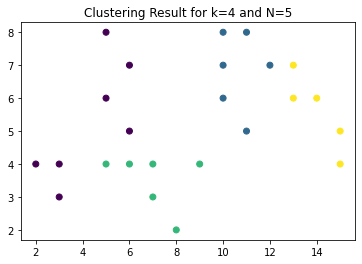

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


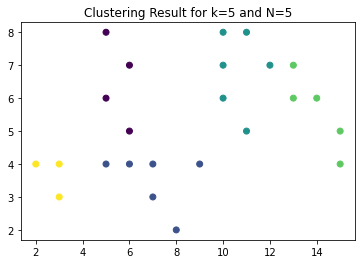

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


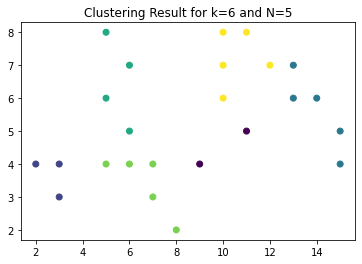

In [188]:
NN_plot(5,2)
NN_plot(5,3)
NN_plot(5,4)
NN_plot(5,5)
NN_plot(5,6)

Question 2 "c"

i)

In [30]:
clusters = [[] for i in range(3)]

# Group data points by label
for i in range(len(scattered_points)):
    clusters[labels_3[i]].append(scattered_points[i])

c1 = np.array([clusters[0]])
c1 = c1.reshape(-1, c1.shape[-1])
c2 = np.array([clusters[1]])
c2 = c2.reshape(-1, c2.shape[-1])
c3 = np.array([clusters[2]])
c3 = c3.reshape(-1, c3.shape[-1])
t1 = np.array([[2,4],[3,4],[3,3]])
t2 = np.array([[5,8],[6,7],[5,6],[6,5],[9,4],[5,4],[6,4],[7,4],[7,3],[8,2]])
t3 = np.array([[10,8],[11,8],[10,7],[12,7],[13,7],[10,6],[13,6],[11,5],[14,6],[15,5],[15,4]])
#print(t1.shape)
#print(t2.shape)
#print(t3.shape)
#print(c1)
#print(c2.shape)
#print(c3.shape)